# Predicting the Beats-per-Minute of Songs. Classic ML approaches vs FT-Transformer.

# **1. Linear and Polynomial models**

First, we'll load and prepare the data. It's important to note that even though our task is to detect BPM, the dataset itself is a table containing various metrics that characterize different musical properties.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

In [70]:
train_data = pd.read_csv('/content/drive/MyDrive/BPM detection/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/BPM detection/test.csv')

In [71]:
train_data.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [72]:
test_data.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067


In [73]:
X_train = train_data.loc[:, ~train_data.columns.isin(['BeatsPerMinute', 'id'])]
y_train = train_data['BeatsPerMinute']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

X_test = test_data.loc[:, test_data.columns != 'BeatsPerMinute']

X_train.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
129122,0.781405,-4.356901,0.023500,0.000005,0.000001,0.040420,0.682512,241538.2567,0.541800
493077,0.532378,-8.908300,0.023500,0.012917,0.032240,0.076140,0.483868,180583.7425,0.994667
457814,0.912855,-14.355710,0.120433,0.372479,0.127346,0.024300,0.440126,291223.4702,0.566267
411024,0.471765,-5.637425,0.043413,0.504548,0.162065,0.065687,0.485008,313870.0566,0.492067
397112,0.975000,-11.681864,0.031886,0.086502,0.000001,0.308907,0.682415,243435.6405,0.453667


In [74]:
X_train, X_val, X_test = X_train.to_numpy(), X_val.to_numpy(), X_test.to_numpy()
X_train

array([[ 7.81405210e-01, -4.35690057e+00,  2.35000000e-02, ...,
         6.82512433e-01,  2.41538257e+05,  5.41800000e-01],
       [ 5.32377893e-01, -8.90830019e+00,  2.35000000e-02, ...,
         4.83867610e-01,  1.80583742e+05,  9.94666667e-01],
       [ 9.12855329e-01, -1.43557100e+01,  1.20433255e-01, ...,
         4.40125798e-01,  2.91223470e+05,  5.66266667e-01],
       ...,
       [ 5.53987361e-01, -1.10864724e+01,  5.19134260e-02, ...,
         5.34394056e-01,  2.35567531e+05,  7.61400000e-01],
       [ 9.75000000e-01, -1.60167368e+01,  7.07212060e-02, ...,
         9.59661056e-01,  2.64160716e+05,  7.34666670e-02],
       [ 5.63534307e-01, -1.84389140e+01,  5.24709620e-02, ...,
         3.72577995e-01,  2.99297976e+05,  3.89866667e-01]])

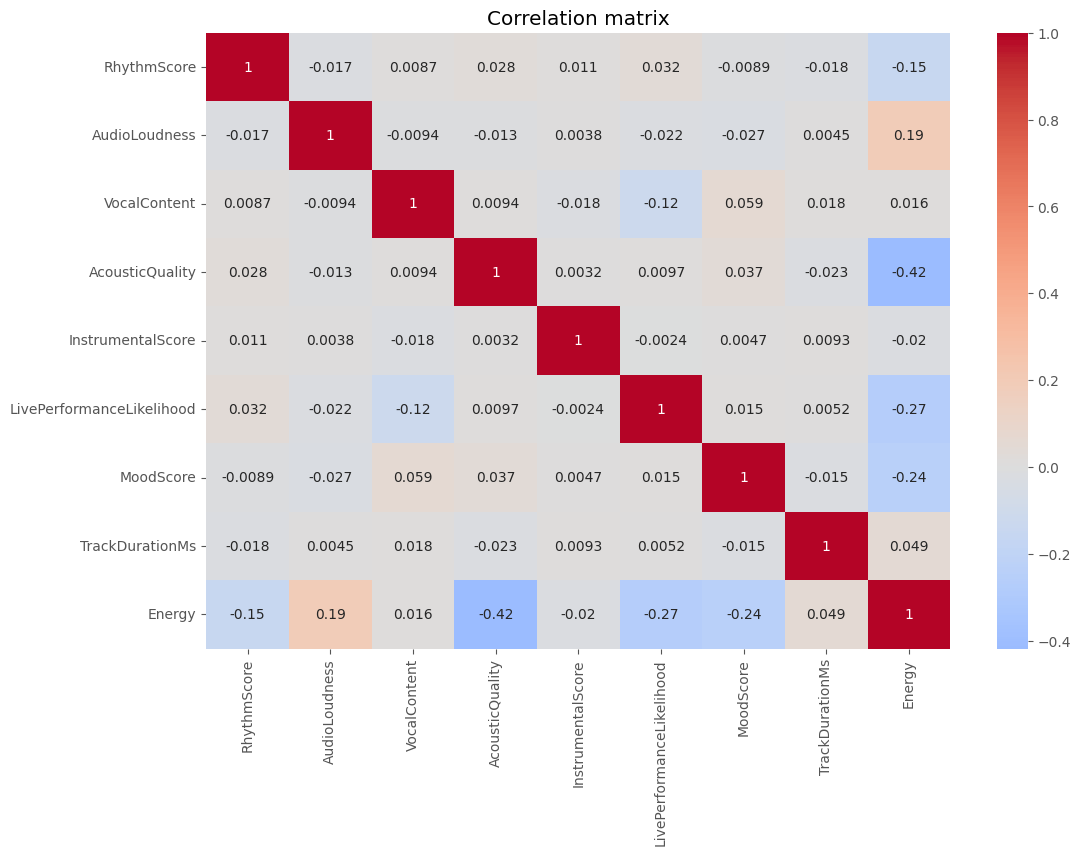

In [75]:
corrs = train_data.loc[:, ~train_data.columns.isin(['BeatsPerMinute', 'id'])].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corrs, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix')
plt.show()

# Linear Regression.

Weak feature correlations suggest that dimensionality reduction is unnecessary at the starting point, so making linear regression a reasonable baseline model.

MSE: 699.27878
R-squared: 0.00009
MAE: 21.18414
MAPE: 0.19790


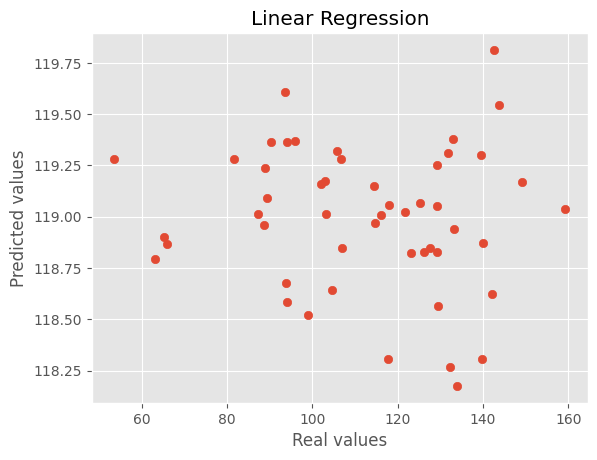

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

scaler = StandardScaler()

X_train_sc, X_val_sc = scaler.fit_transform(X_train), scaler.transform(X_val)


lin_model = LinearRegression().fit(X_train_sc, y_train)
y_pred = lin_model.predict(X_val_sc)
print(f"MSE: {mean_squared_error(y_val, y_pred):.5f}")
print(f"R-squared: {r2_score(y_val, y_pred):.5f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_val, y_pred):.5f}")

plt.scatter(y_val[:50], y_pred[:50])
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Linear Regression")
plt.show()

# Polynomial Regression

Since the linear model demonstrated limited effectiveness, we can try to improve our strategy by adding polynomial features. To manage the resulting increase in dimensionality and avoid overfitting, we will apply PCA to identify the most informative components. Additionally, we plan to cleanse the sample of outliers calculating the Mahalanobis distance.

In [97]:
polynomial_features = 9
K = 5

concat_train, concat_val = [], []

for i in range(polynomial_features):

    for k in range(2, K + 1):
        new_feature = np.pow(X_train_sc[: , i], k)
        concat_train.append(new_feature)

        new_feature = np.pow(X_val_sc[: , i], k)
        concat_val.append(new_feature)


concat_train, concat_val = np.array(concat_train).T, np.array(concat_val).T



X_train_poly = np.concatenate((X_train_sc, concat_train), axis = 1)
X_val_poly = np.concatenate((X_val_sc, concat_val), axis = 1)

X_train_poly = scaler.fit_transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

In [98]:
X_train_poly.shape

(419331, 45)

In [99]:
from sklearn.decomposition import PCA

n_features = X_train_poly.shape[1]
pca = PCA(n_components = n_features)
pca.fit(X_train_poly)
print('PCA var ratio:')
print(pca.explained_variance_ratio_)


#Updating n_features value:
tmp_sum = 0
for i in range(n_features):
    tmp_sum += pca.explained_variance_ratio_[i]
    if tmp_sum >= 0.975:
        n_features = i + 1
        break

#Projecting and dimension lowering
X_train_poly, X_val_poly = pca.transform(X_train_poly)[:, :n_features], pca.transform(X_val_poly)[:, :n_features]


PCA var ratio:
[1.03942255e-01 9.52020204e-02 9.35970460e-02 8.78356560e-02
 8.36623374e-02 8.10771985e-02 7.12234757e-02 6.94986870e-02
 5.65031406e-02 4.35616639e-02 3.07235625e-02 3.00561731e-02
 2.54901861e-02 1.97875054e-02 1.79913953e-02 1.26200825e-02
 1.22866525e-02 9.75069371e-03 9.20268960e-03 8.12585195e-03
 6.04571186e-03 5.80329376e-03 4.68027152e-03 4.02041369e-03
 3.74456558e-03 3.20609082e-03 3.06671085e-03 1.64907733e-03
 1.13236939e-03 8.79364575e-04 8.13526042e-04 5.97908051e-04
 5.33784283e-04 3.10488021e-04 2.94685976e-04 2.33509871e-04
 2.27841380e-04 2.10267712e-04 1.13964177e-04 1.08790867e-04
 7.92529195e-05 6.41403208e-05 1.88840139e-05 1.43926047e-05
 1.24210960e-05]


In [100]:
X_train_poly.shape

(419331, 23)

In [101]:
def mahalanobis_dist(X, pca):
    n_features = X.shape[0]
    inv_sigma = np.diag([1/eigen for eigen in pca.explained_variance_[:n_features]])

    return np.sqrt(X @ inv_sigma @ X.T)

dist = np.array([mahalanobis_dist(x, pca) for x in X_train_poly])

mask = (dist <= np.percentile(dist, 97.5))

X_train_poly = X_train_poly[mask]
y_train_poly = y_train[mask]

MSE: 699.30426
R-squared: 0.00006
MAE: 21.18369
MAPE: 0.19791


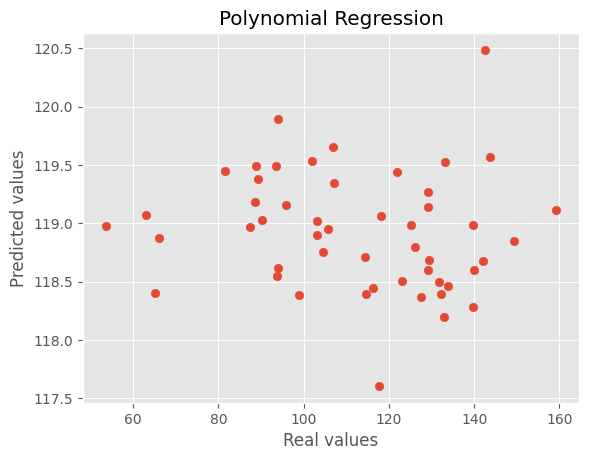

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

poly_model = LinearRegression().fit(X_train_poly, y_train_poly)
y_pred = poly_model.predict(X_val_poly)
print(f"MSE: {mean_squared_error(y_val, y_pred):.5f}")
print(f"R-squared: {r2_score(y_val, y_pred):.5f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred):.5f}")
print(f"MAPE: {mean_absolute_percentage_error(y_val, y_pred):.5f}")

plt.scatter(y_val[:50], y_pred[:50])
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Polynomial Regression")
plt.show()

**Conclusion:**

**The polynomial regression model above, even after cleaning the data of outliers and reducing its dimensionality with PCA, did not yield a significant improvement. The results still show a mean absolute error of around 21 BPM.**